In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

In [2]:
df=pd.read_csv('car_purchasing.csv')

#### Exploratory data analysis

In [3]:
df.sample(10)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
275,Calvin A. Lancaster,ante.bibendum.ullamcorper@fringilla.net,South Africa,1,28.740244,69171.95281,6354.833826,613104.78400,38705.65839
231,Emerald U. Hanson,dui.quis.accumsan@pedeCrasvulputate.co.uk,United Arab Emirates,0,49.461686,77435.46545,6922.152838,48620.32123,44432.71747
147,Nero Morgan,non.sapien@seddictumeleifend.edu,Bahrain,0,61.103198,38779.18396,12758.895830,581497.88740,47935.93940
391,"Barr, Hyatt D.",sem@odiovel.edu,Mexico,1,55.576969,46412.82136,11652.272900,595028.84310,47970.76767
337,"Dudley, Ryder M.",sed@sedtortor.co.uk,Falkland Islands,1,35.485200,56807.01728,8851.564939,385250.71630,30826.10903
204,Abra D. Golden,odio@Duis.com,Poland,0,53.762732,65834.56889,15353.257740,152012.35300,44525.02085
228,Samson N. Wagner,magna@sagittisaugueeu.org,Saint Barth�lemy,1,54.730457,72302.03223,10813.756550,234159.07930,51355.71060
123,Merrill Bailey,natoque.penatibus@nislsem.net,Ecuador,0,47.145467,65468.14420,7248.541420,588570.89030,51402.61506
411,Walter,metus.vitae.velit@CuraePhasellus.co.uk,Antarctica,1,44.099227,67121.32166,12087.381160,472403.12310,46402.53583
144,Barry Larsen,Praesent.eu.dui@bibendumsed.com,Wallis and Futuna,0,57.458598,68090.50870,6181.970908,316064.03380,53655.53859


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [6]:
df.describe(include='O')

,customer name,customer e-mail,country
count,500,500,500
unique,498,500,211
top,Walter,egestas.blandit.Nam@semvitaealiquam.com,Bolivia
freq,2,1,6


In [7]:
duplicates=df.duplicated().sum()
print("No of duplicates rows in dataset is",duplicates)

No of duplicates rows in dataset is 0


In [8]:
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

#### Univariate Analysis

In [9]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [10]:
df.country.value_counts()

Bolivia       6
Mauritania    6
Israel        6
Armenia       5
Laos          5
             ..
Lebanon       1
Chad          1
Seychelles    1
Germany       1
Peru          1
Name: country, Length: 211, dtype: int64

In [11]:
country_unique=df.country.nunique()
print("No of unique country in dataset is",country_unique)

No of unique country in dataset is 211


In [12]:
df.gender.value_counts()

1    253
0    247
Name: gender, dtype: int64

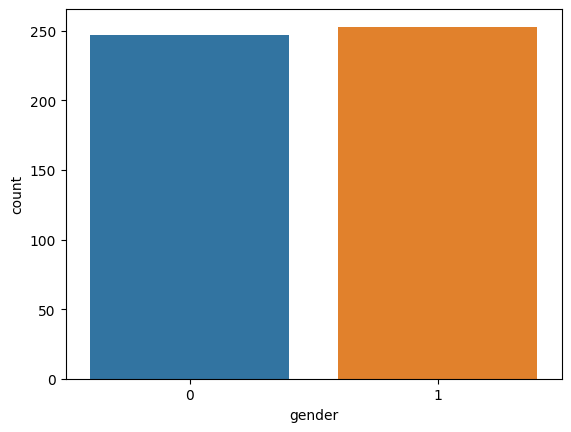

In [13]:
sns.countplot(data=df,x='gender')
plt.show()

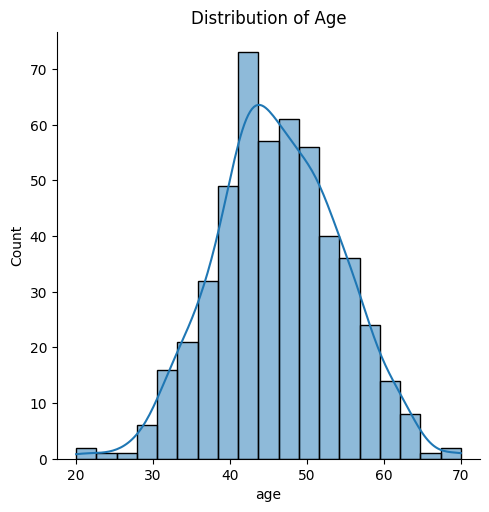

In [14]:
sns.displot(data=df,x='age',kde=True)
plt.title('Distribution of Age')
plt.show()

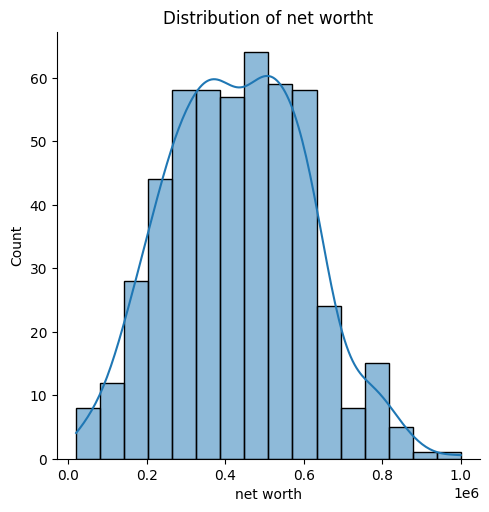

In [15]:
sns.displot(data=df,x='net worth',kde=True)
plt.title('Distribution of net wortht')
plt.show()

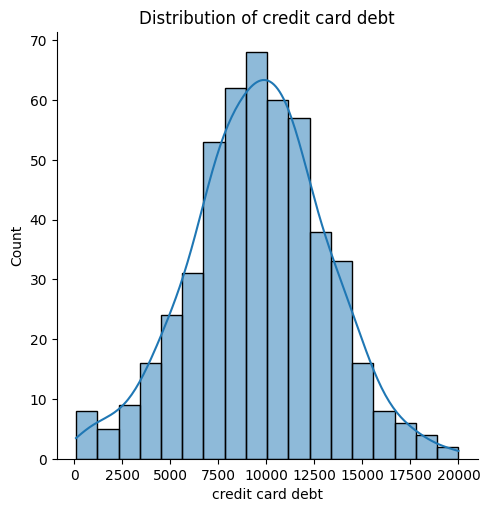

In [16]:
sns.displot(data=df,x='credit card debt',kde=True)
plt.title('Distribution of credit card debt')
plt.show()

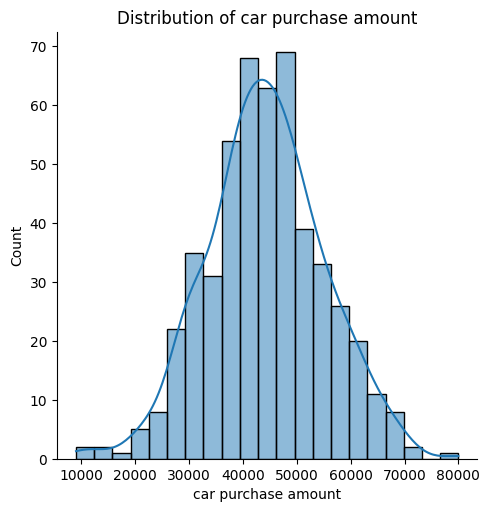

In [17]:
sns.displot(data=df,x='car purchase amount',kde=True)
plt.title('Distribution of car purchase amount')
plt.show()

#### Bivariate Analysis

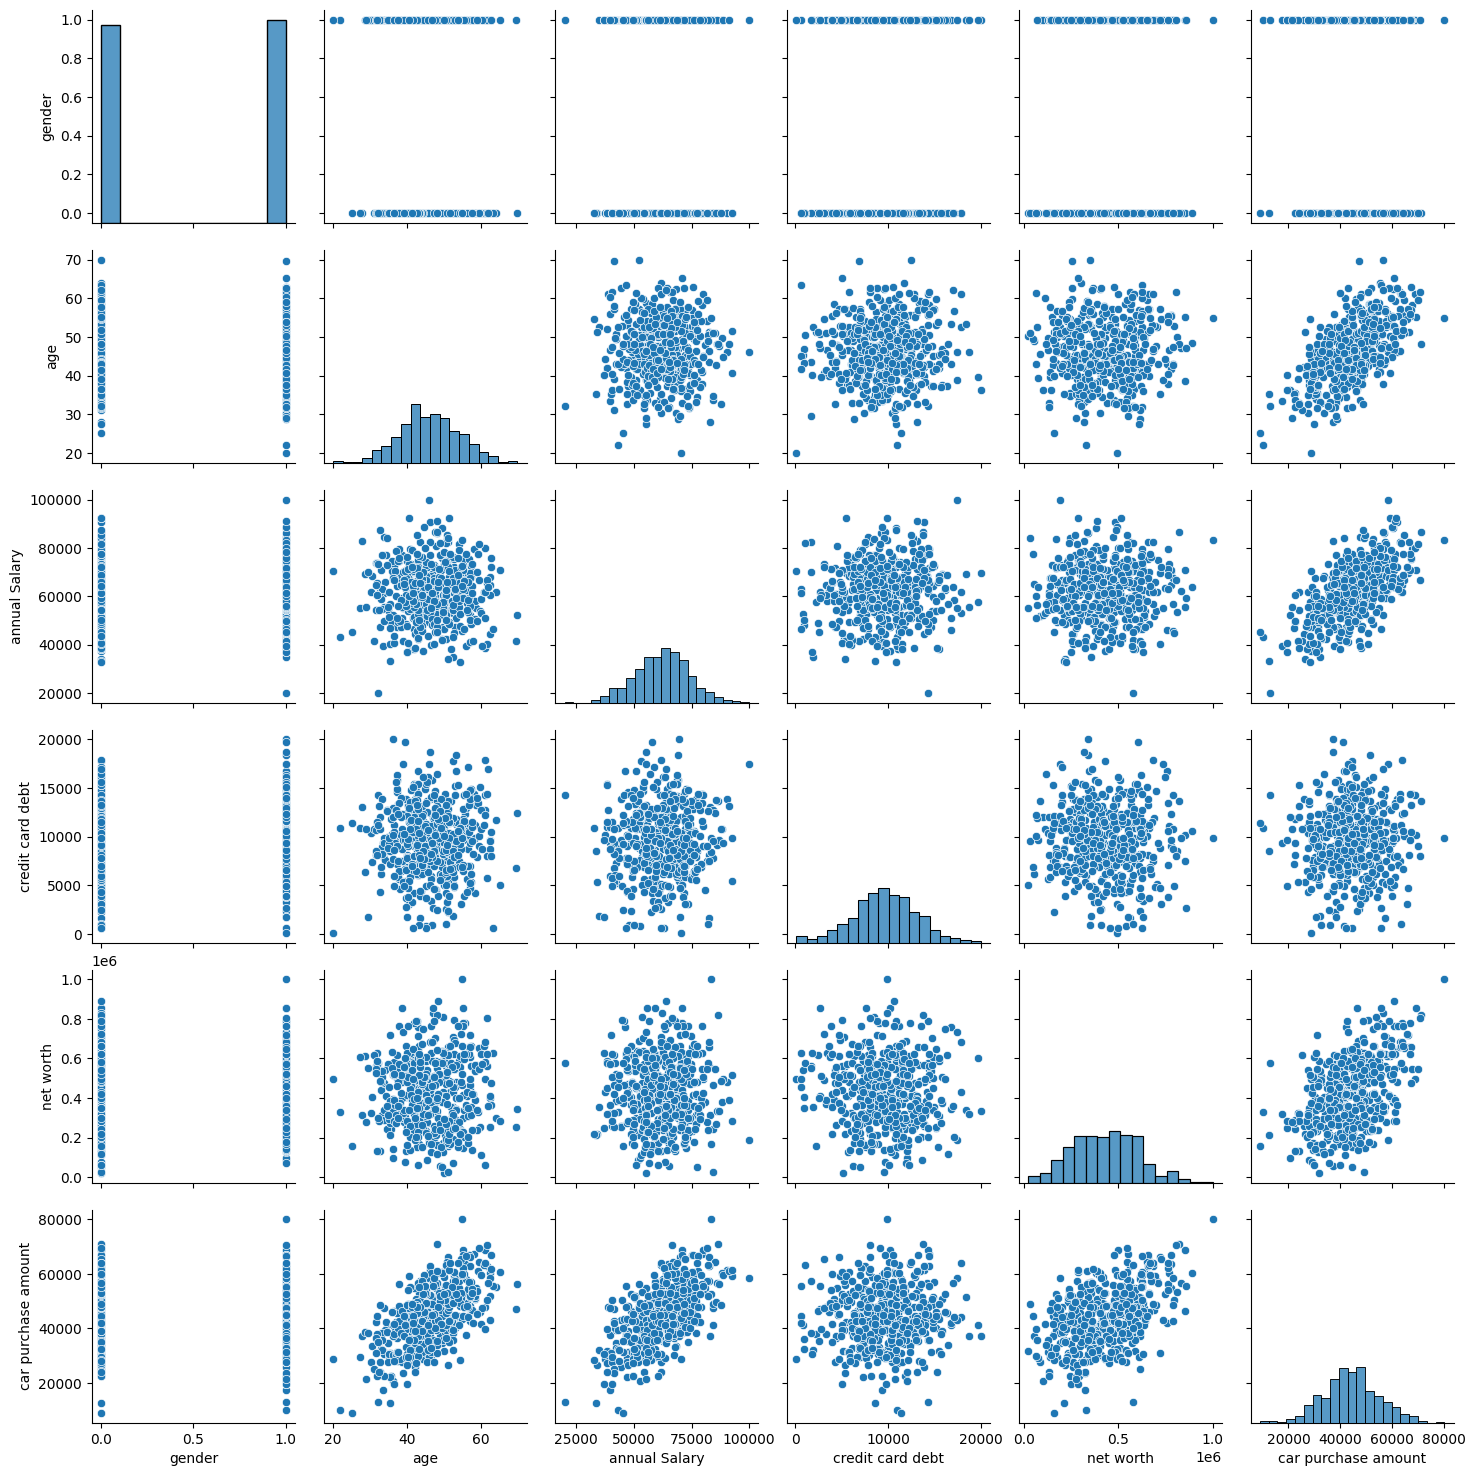

In [18]:
sns.pairplot(df)
plt.show()

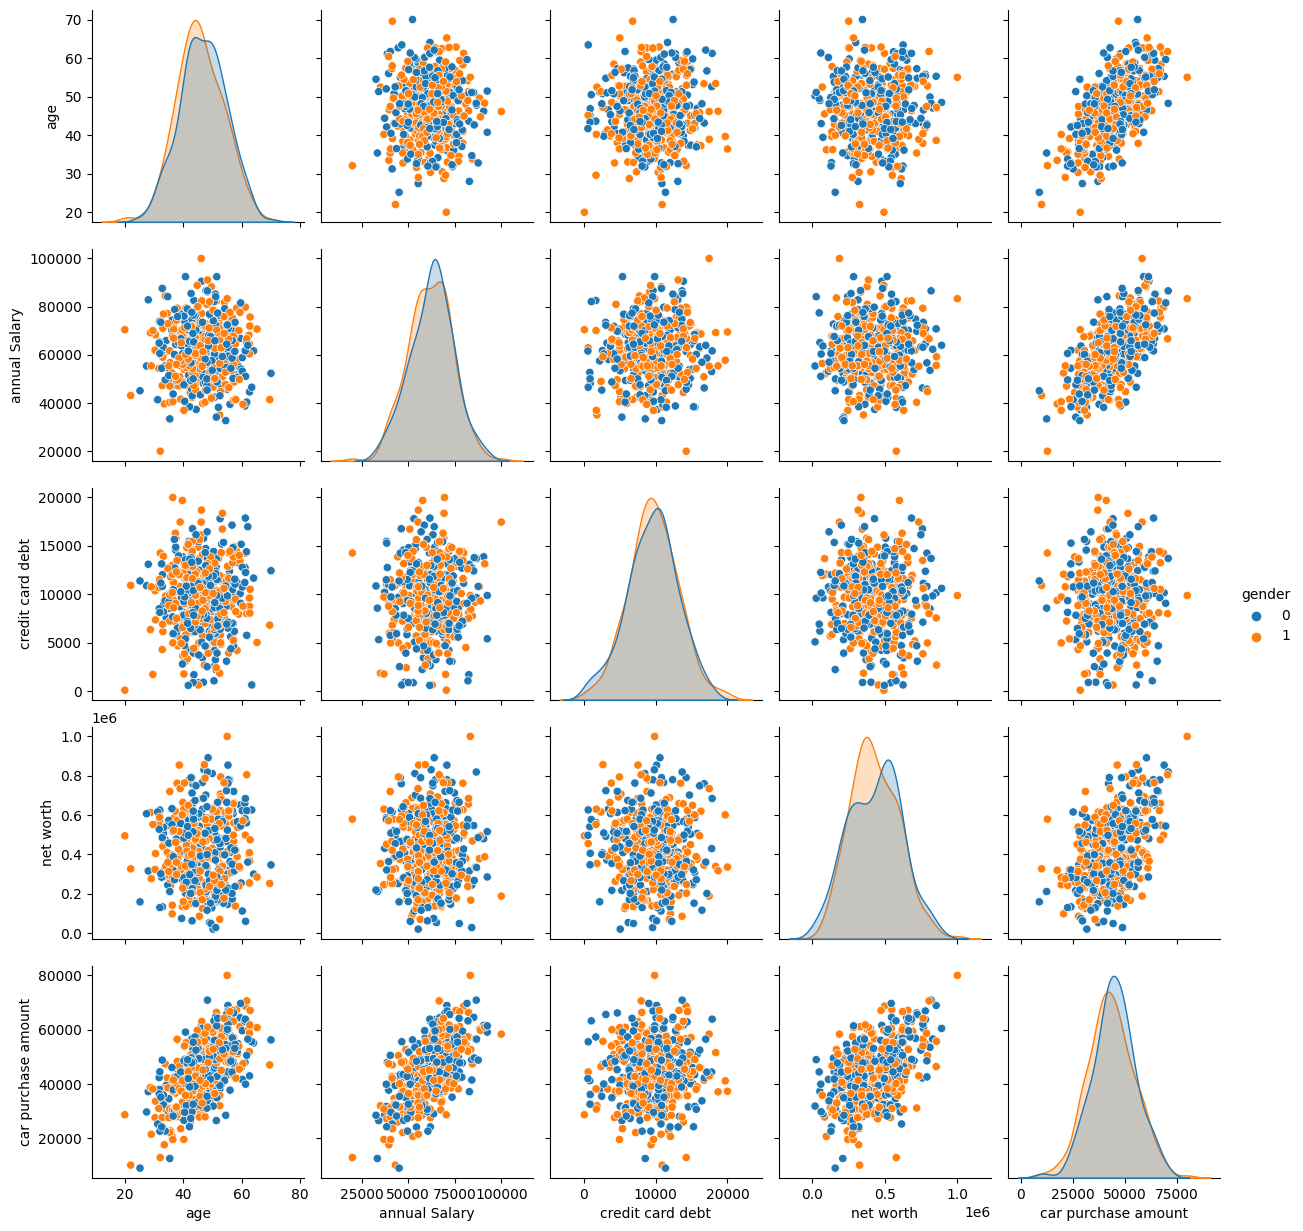

In [19]:
# Effect of Gender on Data
sns.pairplot(df,hue='gender')
plt.show()

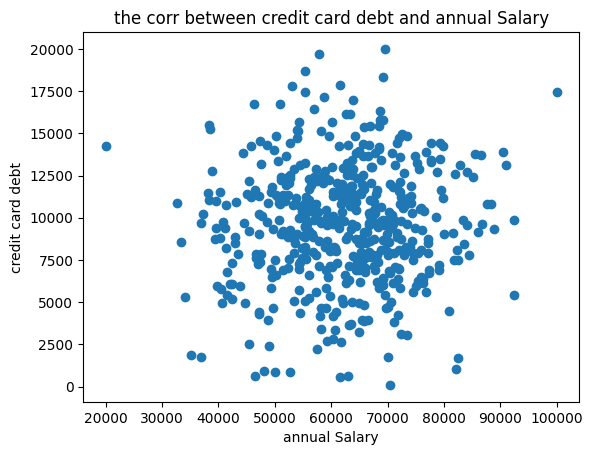

In [20]:
#Create a Scatter plot to show the distrbution between 'credit card debt' and 'annual Salary'

plt.scatter(df['annual Salary'] , df['credit card debt'])
plt.xlabel('annual Salary')
plt.ylabel('credit card debt')
plt.title('the corr between credit card debt and annual Salary')
plt.show()

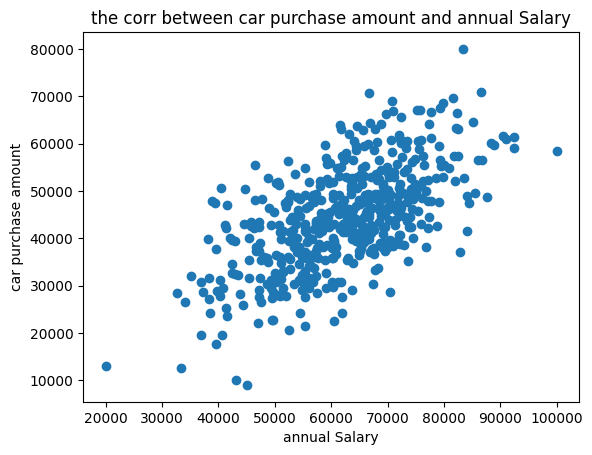

In [21]:
#Create a Scatter plot to show the distrbution between 'car purchase amount' and 'annual Salary'

plt.scatter(df['annual Salary'] , df['car purchase amount'])
plt.xlabel('annual Salary')
plt.ylabel('car purchase amount')
plt.title('the corr between car purchase amount and annual Salary')
plt.show()

In [22]:
df.corr()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


<AxesSubplot:>

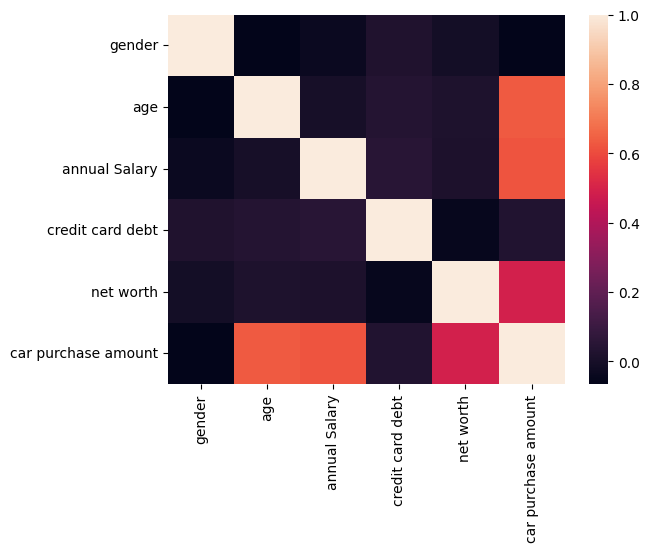

In [23]:
sns.heatmap(df.corr())

### Data Preprocessing

###### Drop Unneeded Columns

We can see that the correlation between different columns show that they are not necessary, so we will drop them.

In [24]:
df.drop(columns=['customer name' , 'customer e-mail' , 'country' , 'gender'] , inplace= True)
df

,age,annual Salary,credit card debt,net worth,car purchase amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [25]:
X = df.iloc[: , :-1]
y = df.iloc[: ,-1]

In [26]:
y = y.values.reshape(-1,1)
y.shape

(500, 1)

In [27]:
standartd_scale=StandardScaler()
x_standartd_scale=standartd_scale.fit_transform(X)
y_standartd_scale=standartd_scale.fit_transform(y)

In [28]:
minmax_scale=MinMaxScaler()
x_standartd_scale=minmax_scale.fit_transform(X)
y_standartd_scale=minmax_scale.fit_transform(y)

In [29]:
X_train , X_test , y_train , y_test = train_test_split(x_standartd_scale, y_standartd_scale , test_size = 0.2 , random_state = 42)

print(f'the shape of X train is {X_train.shape}')
print(f'the shape of y train is {y_train.shape}')
print(f'the shape of X test is {X_test.shape}')
print(f'the shape of y test is {y_test.shape}')

the shape of X train is (400, 4)
the shape of y train is (400, 1)
the shape of X test is (100, 4)
the shape of y test is (100, 1)


# Machine Learning Model

##### Linear Regression

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)

lr_pred = lr_model.predict(X_test)

mae=mean_absolute_error(y_test , lr_pred)
score=r2_score(y_test , lr_pred )

print('MAE of Linear Regression Model is',mae)
print('Score of Linear Regression Model is',score)

MAE of Linear Regression Model is 1.6198371057395967e-05
Score of Linear Regression Model is 0.9999999808303804


#### Random Forest Regressor

In [31]:
forest_model=RandomForestRegressor()
forest_model.fit(X_train , y_train.ravel())

forest_pred = forest_model.predict(X_test)

mae=mean_absolute_error(y_test , forest_pred)
score=r2_score(y_test , forest_pred )

print('MAE of Linear RandomForestRegressor Model is',mae)
print('Score of Linear RandomForestRegressor Model is',score)

MAE of Linear RandomForestRegressor Model is 0.023331618106028174
Score of Linear RandomForestRegressor Model is 0.9500926010434978


#### ANN

In [32]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171 (684.00 Byte)
Trainable params: 171 (684.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history = model.fit(X_train , y_train , epochs = 50 , validation_split= 0.2)

Epoch 1/50
10/10 [==============================] - 1s 24ms/step - loss: 1.2659 - mean_absolute_error: 1.0907 - val_loss: 1.0348 - val_mean_absolute_error: 0.9874
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9585 - mean_absolute_error: 0.9446 - val_loss: 0.7673 - val_mean_absolute_error: 0.8450
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.7094 - mean_absolute_error: 0.8058 - val_loss: 0.5513 - val_mean_absolute_error: 0.7098
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5072 - mean_absolute_error: 0.6756 - val_loss: 0.3857 - val_mean_absolute_error: 0.5864
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.3540 - mean_absolute_error: 0.5553 - val_loss: 0.2601 - val_mean_absolute_error: 0.4742
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2383 - mean_absolute_error: 0.4445 - val_loss: 0.1664 - val_mean_absolute_error: 0.3702
Epoch 7/50
10/10 [=========

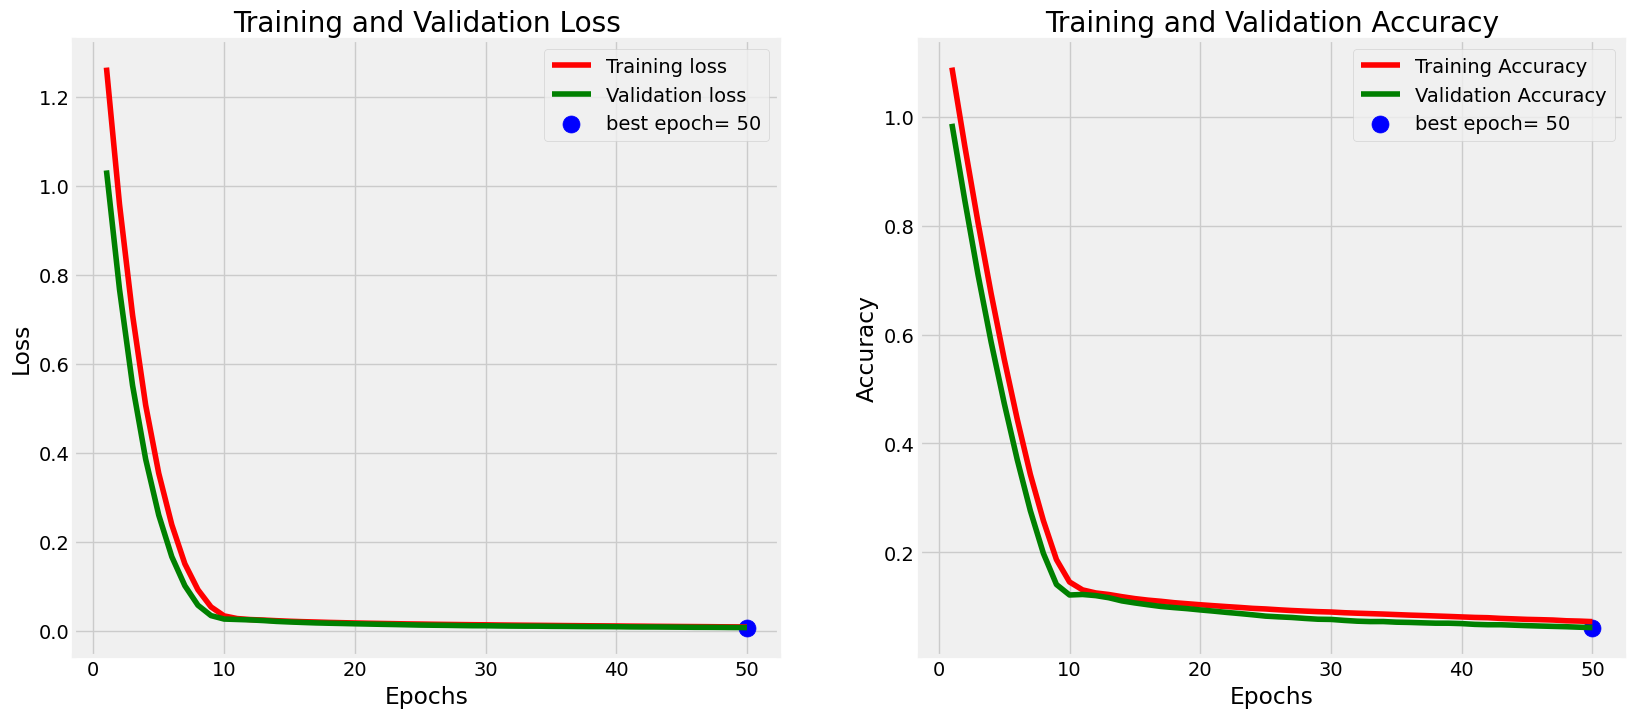

In [34]:
# Define needed variables
tr_acc = history.history['mean_absolute_error']
tr_loss = history.history['loss']
val_acc = history.history['val_mean_absolute_error']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmin(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [35]:
y_pred = model.predict(X_test)
test_acc = r2_score(y_test , y_pred)
print(f'R2 Score of ANN Model= {test_acc}')

4/4 [==============================] - 0s 3ms/step
R2 Score of ANN Model= 0.6966317682143819


###### Highiest Score is 0.99 which is given by Linear Regression Model